In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'test_images', 'train.csv', 'sample_submission.csv', 'train_images']


**SET UP**

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

메모리 사용을 효율화 시키기

**DOWNLOAD AND INSPECT THE DATASET**

- we already have them downloaded in kaggle. 


cf) NO NEED 

import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

In [4]:
!ls ../ -al

total 24
drwxr-xr-x 6 root root 4096 Apr 13 08:47 .
drwxr-xr-x 1 root root 4096 Apr 13 08:47 ..
drwxr-xr-x 2 root root 4096 Apr 13 08:47 config
drwxr-xr-x 4 root root 4096 Mar 27 02:15 input
drwxr-xr-x 3 root root 4096 Apr  9 20:24 lib
drwxr-xr-x 3 root root 4096 Apr 13 08:47 working


In [5]:
df=pd.read_csv("../input/train.csv")
#..나보다 하나 위의 디렉토리, 그 안의 input, 그 안의 train.csv file

In [6]:
df.sample(5)

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
46091,0,2014-05-26 10:32:29,59292ff9-23d2-11e8-a6a3-ec086b02610b.jpg,1,59292ff9-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6fb95ad9-5567-11e8-a95e-dca9047ef277,1,1024,747
157134,0,2014-03-11 21:00:00,59ddc32e-23d2-11e8-a6a3-ec086b02610b.jpg,1,59ddc32e-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f861aa8-5567-11e8-8994-dca9047ef277,1,1024,747
186088,13,2012-01-15 07:23:32,586c87a7-23d2-11e8-a6a3-ec086b02610b.jpg,3,586c87a7-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f11e259-5567-11e8-af66-dca9047ef277,3,1024,747
161517,11,2011-07-15 05:50:44,588f66f1-23d2-11e8-a6a3-ec086b02610b.jpg,1,588f66f1-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f118878-5567-11e8-abfe-dca9047ef277,3,1024,747
69397,11,2012-05-17 08:36:33,59d27dc0-23d2-11e8-a6a3-ec086b02610b.jpg,3,59d27dc0-23d2-11e8-a6a3-ec086b02610b,64,Justin Brown,6f19a48f-5567-11e8-b9f3-dca9047ef277,3,1024,747


we will only use some info

In [7]:
id=df["category_id"]
id
#we want to see id of the animals

0         19
1         19
2          0
3          0
4          0
5          3
6          8
7          0
8          0
9          0
10         0
11         0
12         4
13        13
14        19
15        19
16         0
17        13
18         1
19        11
20         0
21        19
22         0
23        13
24         0
25         0
26         8
27         0
28         0
29         0
          ..
196269     0
196270     0
196271    18
196272     0
196273     0
196274     0
196275     0
196276     0
196277     8
196278     0
196279     0
196280     8
196281     0
196282     0
196283     0
196284     0
196285    13
196286     0
196287     0
196288     0
196289    19
196290     0
196291     8
196292     0
196293    13
196294     0
196295     0
196296     4
196297     0
196298     0
Name: category_id, Length: 196299, dtype: int64

In [8]:
f=df["file_name"] 
f

0         5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg
1         588a679f-23d2-11e8-a6a3-ec086b02610b.jpg
2         59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg
3         5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg
4         599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg
5         593d68d7-23d2-11e8-a6a3-ec086b02610b.jpg
6         59fae563-23d2-11e8-a6a3-ec086b02610b.jpg
7         58782b45-23d2-11e8-a6a3-ec086b02610b.jpg
8         5911d8fd-23d2-11e8-a6a3-ec086b02610b.jpg
9         59292e5e-23d2-11e8-a6a3-ec086b02610b.jpg
10        58b13139-23d2-11e8-a6a3-ec086b02610b.jpg
11        59c806c2-23d2-11e8-a6a3-ec086b02610b.jpg
12        595f7b9c-23d2-11e8-a6a3-ec086b02610b.jpg
13        58adc33d-23d2-11e8-a6a3-ec086b02610b.jpg
14        5883e97b-23d2-11e8-a6a3-ec086b02610b.jpg
15        58d47cf1-23d2-11e8-a6a3-ec086b02610b.jpg
16        5a096958-23d2-11e8-a6a3-ec086b02610b.jpg
17        588a66f6-23d2-11e8-a6a3-ec086b02610b.jpg
18        59adfdd1-23d2-11e8-a6a3-ec086b02610b.jpg
19        59bac8fe-23d2-11e8-a6

In [9]:
#f is a panda data series
print(type(f))

<class 'pandas.core.series.Series'>


In [10]:
#but we'd like to have a list
all_image_paths=['../input/train_images/'+fname for fname in f]
#specifies the directory '../input/train_images'
all_image_paths[:10]

['../input/train_images/5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/588a679f-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/593d68d7-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/59fae563-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/58782b45-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/5911d8fd-23d2-11e8-a6a3-ec086b02610b.jpg',
 '../input/train_images/59292e5e-23d2-11e8-a6a3-ec086b02610b.jpg']

for fname in f:
    all_image_path= ~~~~
--> 한번에 쓰기
[ fname for fname in f]


In [11]:
#same thing for categroy name which will be used as labels
all_image_labels=[i for i in id]
all_image_labels[:10]

[19, 19, 0, 0, 0, 3, 8, 0, 0, 0]

In [12]:
import random
import IPython.display as display

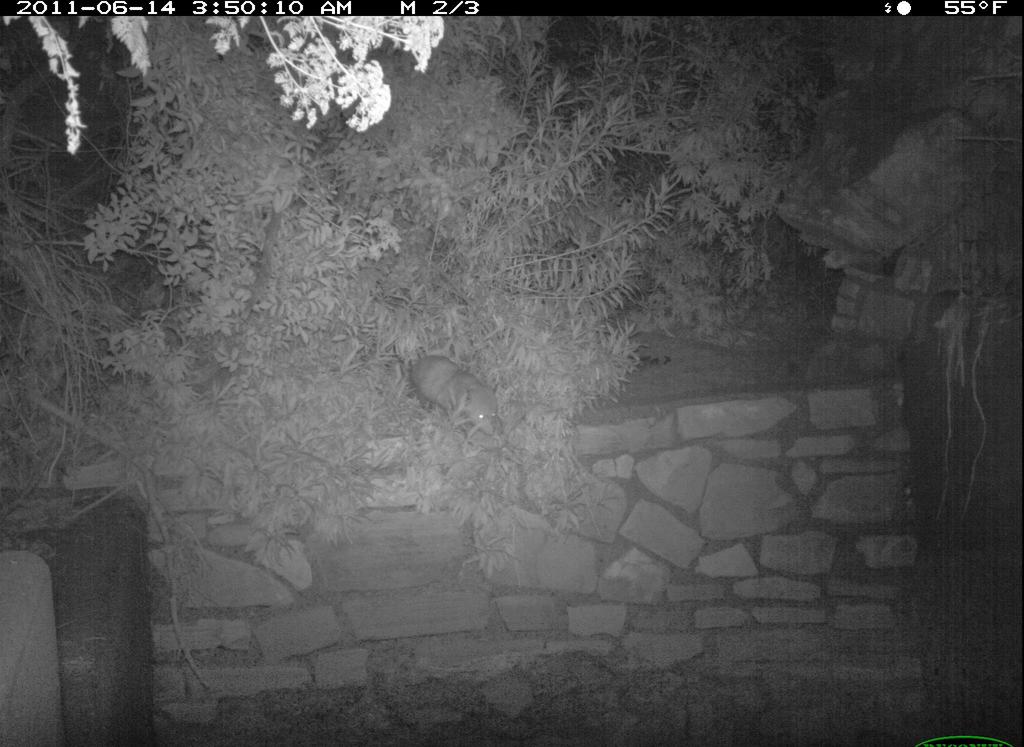

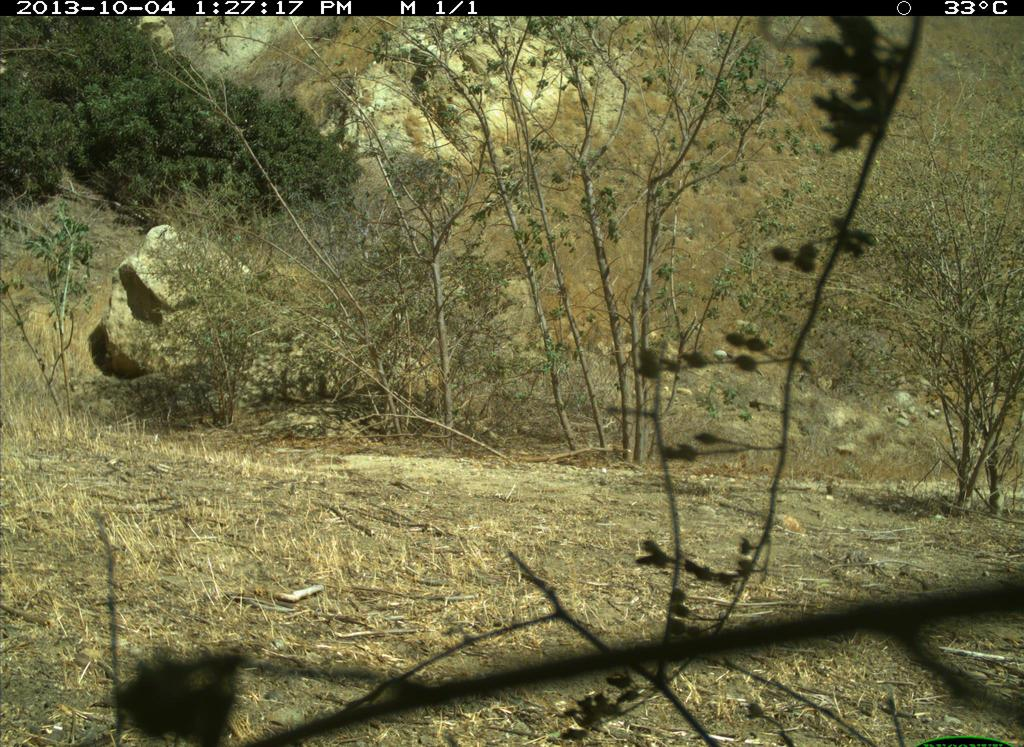

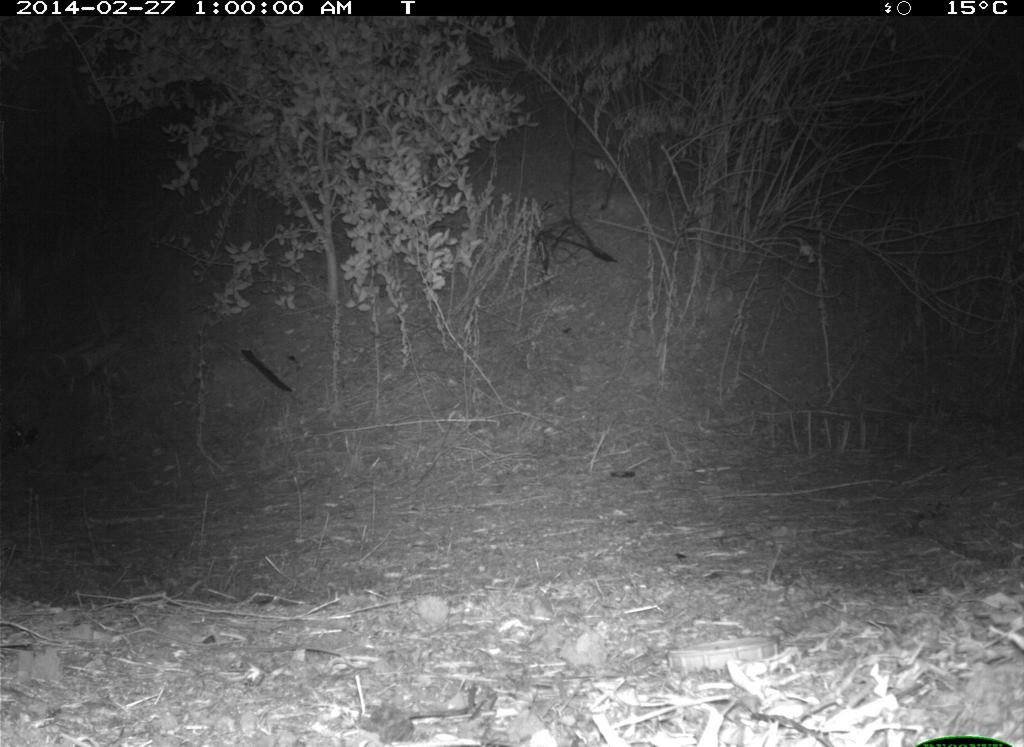

In [13]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  #print(caption_image(image_path))
  print()

print(caption_image(image_path))
is to make put captions under each photo
i.e. Image (CC BY 2.0)  by Gregorio Puga Bailón
but not in our example

**THIS PART WAS NOT COVERED IN THE LECTURE!!!**

**Determine the label for each image**
(JIYOUNG) the data given already has the indexed lables ready 


**all_image_labels=[i for i in id]
all_image_labels[:10]**

so we can skip the assigning index step

**Load and format the images**

In [14]:
img_path=all_image_paths[10]
img_path

'../input/train_images/58b13139-23d2-11e8-a6a3-ec086b02610b.jpg'

**the raw data**

In [15]:
img_raw = tf.io.read_file(image_path)
print(repr(img_raw)[:100]+"...")
#repr returns a printable representational string of a given object 
#and then with [:100] we are extracting until the 100th string 
#and ading "..."to be cool

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


**decode into an image tensor**
it "SEEMS" we are trying to make the raw image into sth usable in tensorflow

In [16]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(747, 1024, 3)
<dtype: 'uint8'>


**resize**

In [17]:
img_final=tf.image.resize(img_tensor,[192,192])
img_final=img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


(192,192,3) 3 here is a "channels" which means it is a color scale image

**making the process into a function for later use**

In [18]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

> img_tensor = tf.image.decode_image(img_raw)

> img_final=tf.image.resize(img_tensor,[192,192])

> img_final=img_final/255.0

made these three into a function proprocess_image

which will decode our input "image" into "jpeg" with colors (channels=3)
then resize the decoded image into 192 by 192 
an then normalize it 

In [19]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

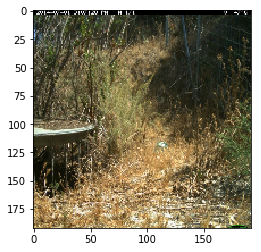

In [20]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
#plt.xlabel(caption_image(img_path))
#plt.title(label_names[label].title())
print()

we succeeded in calling in a image and then process it into smaller 192 by 192 size

**BUILD a tf.data.Dataset**

The easiest way to build a tf.data.Dataset is using the from_tensor_slices method.

Slicing the array of strings, results in "a dataset of strings":

In [21]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

The `shapes` and `types` describe the content of each item in the dataset. In this case it is a set of scalar binary-strings


In [22]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


Now create a new dataset that loads and formats images on the fly by mapping `preprocess_image` over the dataset of paths.

In [23]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

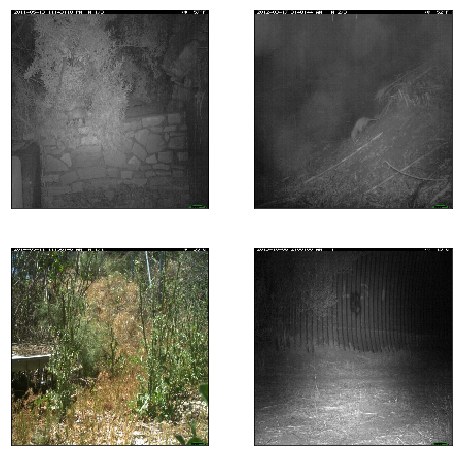

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

**A dataset of (image, label) pairs**
>using the same from_tensor_slices method we can build a dataset of labels

In [25]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [26]:
for label in label_ds.take(20):
    print(label.numpy())
#print(label_names[label.numpy()])-we have never defined label_names 

19
19
0
0
0
3
8
0
0
0
0
0
4
13
19
19
0
13
1
11


Since the datasets are in the same order we can just zip them together to get a dataset of `(image, label)` pairs.


In [27]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [28]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


**Note**: When you have arrays like `all_image_labels` and `all_image_paths` an alternative to `tf.data.dataset.Dataset.zip` is to slice the pair of arrays.

In [29]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

**Basic set up for training**
- shuffle
- batch
- repeat forever
- batches to be available ASAP

In [46]:
image_count= 1000

In [47]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

1. first shuffle; ds = image_label_ds.shuffle(buffer_size=image_count)
will shuffle items across epoch boundaries (some items will be seen twice before others are seen at all).

2. second shuffle: ds = ds.prefetch(buffer_size=AUTOTUNE)
will shuffle the order of the batches but not shuffle he items across batches

**Pipe the dataset to a model**

Fetch a copy of MobileNet v2 from `tf.keras.applications`.

This will be used for a simple transfer learning example.

In [48]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable = False

This model expects its input to be normalized to the [-1,1] range:

this function applies the "Inception" preprocessing which converts the RGB values from [0,255] to [-1,1]

In [49]:
def change_range(image,label):
  return 2*image-1, label

keras_ds = ds.map(change_range)

The MobileNet returns a 6 by 6 spatial grid of features for each image
pass it a batch of images to see the following

In [50]:
# The dataset may take a few seconds to start, as it fills its shuffle buffer.
image_batch, label_batch = next(iter(keras_ds))

In [51]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


So build a model wrapped around MobileNet, and use tf.keras.layers.GlobalAveragePooling2D to average over those space dimensions, before the output tf.keras.layers.Dense layer:

In [52]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(22)])

In [53]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -3.6036012
max logit: 2.6333435

Shape: (32, 22)


In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [55]:
len(model.trainable_variables)

2

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                28182     
Total params: 2,286,166
Trainable params: 28,182
Non-trainable params: 2,257,984
_________________________________________________________________


**Training**

In [57]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

6135.0

In [59]:
model.fit(ds,epochs=5, steps_per_epoch=3)

Epoch 1/5
3/3 [==============================] - 13s 4s/step - loss: 3.4990 - accuracy: 0.6458
Epoch 2/5
3/3 [==============================] - 7s 2s/step - loss: 4.9494 - accuracy: 0.6250
Epoch 3/5
3/3 [==============================] - 7s 2s/step - loss: 4.2290 - accuracy: 0.6458
Epoch 4/5
3/3 [==============================] - 7s 2s/step - loss: 3.3276 - accuracy: 0.7500
Epoch 5/5
3/3 [==============================] - 7s 2s/step - loss: 5.5180 - accuracy: 0.6042
